# Classification problem

### Logistic regression
 
    We want to classify wether the patient dies or survives

In [237]:
from matplotlib.pylab import figure, plot, xlabel, ylabel, legend, ylim, show
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score
import pandas as pd
import numpy as np
import seaborn as sns

In [238]:
filename = 'heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(filename)



y = df['DEATH_EVENT']
X = df.drop(['DEATH_EVENT'], axis = 1)
attributeNames = list(X.keys())

total = X["sex"].value_counts()
print(total)

mu = np.mean(X, 0)
sigma = np.std(X, 0)
X = (X - mu) / sigma
classNames = "DEATH_EVENT"
N, M = X.shape
C = 2



1    194
0    105
Name: sex, dtype: int64


In [239]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size= 0.7)
lambda_value = 0.000010
log_reg = lm.LogisticRegression(max_iter= 1000, C= 1/ lambda_value)
log_reg.fit(x_train,y_train)

LogisticRegression(C=99999.99999999999, max_iter=1000)

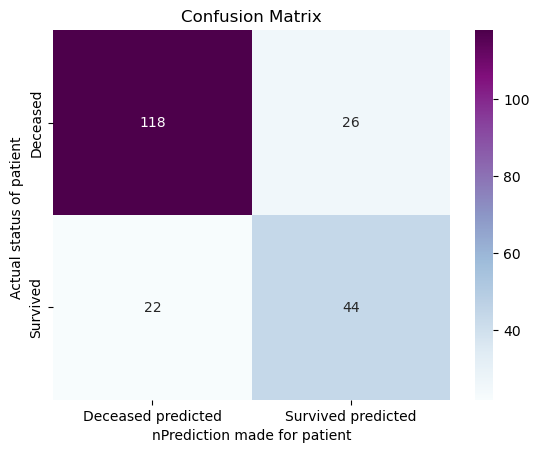

0.6285714285714286

In [240]:
y_pred = log_reg.predict(x_test)

ConfusionMatrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(ConfusionMatrix, annot=True, cmap="BuPu", fmt='g')
ax.set_title("Confusion Matrix");
ax.set_xlabel("nPrediction made for patient")
ax.set_ylabel("Actual status of patient ");
## Ticket labels – List must be in alphabetical order
ax.xaxis.set_ticklabels(["Deceased predicted","Survived predicted"])
ax.yaxis.set_ticklabels(["Deceased","Survived"])
## Display the visualization of the Confusion Matrix.
plt.show()


precision_score(y_test, y_pred)



In [241]:
coef = log_reg.coef_
np.set_printoptions(suppress= True)
print(coef)

[[ 1.17831332  0.20721592  0.44815594  0.4645128  -1.46883954 -0.48375104
  -0.57935187  1.36602391  0.15617035 -0.44249262  0.71866925 -1.5377965 ]]


In [242]:
kfolds = StratifiedKFold(n_splits= 10)

for train_index, test_index in kfolds.split(x_train, y_train):
    clone_LGR = clone(log_reg)
    X_train_folds = x_train.iloc[train_index]
    y_train_folds = y_train.iloc[train_index]
    X_test_folds = x_train.iloc[test_index]
    y_test_folds = y_train.iloc[test_index]

    clone_LGR.fit(X_train_folds, y_train_folds)
    y_pred = clone_LGR.predict(X_test_folds)
    correct = sum(y_test_folds == y_pred)
    print(1 - (correct / len(y_pred)))

0.11111111111111116
0.33333333333333337
0.11111111111111116
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.11111111111111116
0.25
